## Import Packages

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from google.colab import files


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Read Data

In [2]:
# read data
data = pd.read_csv('/content/fraud data - Sheet1.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     18 non-null     int64 
 1   Channel  18 non-null     object
 2   Value    18 non-null     object
 3   Volume   18 non-null     object
dtypes: int64(1), object(3)
memory usage: 704.0+ bytes


## Transform Data

In [3]:
# remove comma from the numbers
data['Value'] = data['Value'].str.replace(',', '').astype(float)
data['Volume'] = data['Volume'].str.replace(',', '').astype(float)
#data = data.drop(['Year'], axis=1)

In [4]:
# one hot encode channel column
df =pd.get_dummies(data['Channel'], prefix='channel')
data = pd.concat([data, df], axis=1)
data = data.drop(columns=['Channel'], axis=1)
#data['Channel_enc'] = OneHotEncoder().fit_transform(data['Channel'])
data.head()

,Year,Value,Volume,channel_ATM,channel_Internet Banking,channel_Mobile,channel_POS,channel_Web,channel_eCommerce
0,2014,2.688669e+09,491.0,1,0,0,0,0,0
1,2014,2.120882e+08,287.0,0,1,0,0,0,0
2,2014,1.332896e+07,21.0,0,0,1,0,0,0
3,2014,1.576108e+08,166.0,0,0,0,1,0,0
4,2014,1.031239e+09,218.0,0,0,0,0,1,0


In [5]:
# scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
features_df = normalised_df.drop(columns=['Volume'])
target = normalised_df['Volume']


#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, target, test_size=0.3, random_state=42)

## Modeling

In [6]:
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)

## Evaluation

In [7]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3) 

0.231

In [8]:
# r2 score
from sklearn.metrics import r2_score
test_r2_score = r2_score(y_test, predicted_values)
round(test_r2_score, 3)

-160.603

In [9]:
# rss
import numpy as np

rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)

0.497

In [10]:
# rmse
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.288

## Regression Model with Pycaret

In [20]:
!pip install pycaret

     |████████████████████████████████| 256kB 2.6MB/s 
     |████████████████████████████████| 6.8MB 4.5MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 266kB 46.8MB/s 
     |████████████████████████████████| 65.9MB 74kB/s 
     |████████████████████████████████| 1.6MB 42.3MB/s 
     |████████████████████████████████| 12.4MB 45.8MB/s 
     |████████████████████████████████| 1.2MB 26.1MB/s 
     |████████████████████████████████| 102kB 10.1MB/s 
     |████████████████████████████████| 266kB 39.3MB/s 
     |████████████████████████████████| 235kB 43.2MB/s 
     |████████████████████████████████| 552kB 39.2MB/s 
     |████████████████████████████████| 1.1MB 35.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 51kB 4.3MB/s 
     |████████████████████████████████| 81kB 5.3MB/s 
     |████████████████████████████████| 6.

In [11]:
from pycaret.datasets import get_data
import pandas as pd
data = pd.read_csv('/content/fraud data - Sheet1.csv')

In [12]:
data.head(7)

,Year,Channel,Value,Volume
0,2014,ATM,"2,688,669,200",491
1,2014,Internet Banking,"212,088,150",287
2,2014,Mobile,"13,328,957",21
3,2014,POS,"157,610,831",166
4,2014,Web,"1,031,239,284",218
5,2014,eCommerce,"58,994,920",114
6,2015,ATM,"355,892,200.00","5,133.00"


In [13]:
data['Value'] = data['Value'].str.replace(',', '').astype(float)
data['Volume'] = data['Volume'].str.replace(',', '').astype(float)


In [14]:
data['Year'] = data['Year'].astype(str).astype(int)

In [15]:
from pycaret.regression import *

In [16]:
s2 = setup(data, target = 'Volume', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True, 
          )

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(18, 4)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [17]:
s2[0].columns

Index(['Value', 'Value_Power2', 'cos(Value)', 'sin(Value)', 'tan(Value)',
       'Year_2014', 'Year_2015', 'Year_2016', 'Channel_ATM ',
       'Channel_Internet Banking  ',
       ...
       'Channel_Web  _multiply_Year_2014',
       'Channel_ATM _multiply_Value_Power2',
       'tan(Value)_multiply_Value_Power2', 'sin(Value)_multiply_Value_Power2',
       'Value_Power2_multiply_Year_2016',
       'Year_2014_multiply_Channel_Internet Banking  ',
       'Channel_POS  _multiply_Year_2015', 'cos(Value)_multiply_Year_2015',
       'Value_Power2_multiply_cos(Value)',
       'sin(Value)_multiply_Channel_Mobile  '],
      dtype='object', length=160)

In [18]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2523.3249,8135944.2574,2852.3577,-22.8961,1.2161,2.3773
1,590.7467,398761.5195,631.4757,0.1023,0.9564,0.5731
2,1080.9781,1168513.6937,1080.9781,nan,0.5529,0.7389
3,3003.1250,9018759.4688,3003.1250,nan,2.9435,18.0911
4,127.0729,16147.5257,127.0729,nan,0.5820,0.4428
5,2980.6226,8884111.1174,2980.6226,nan,0.8688,0.5807
6,472.1086,222886.5711,472.1086,nan,0.1939,0.1764
7,7453.6322,55556632.8397,7453.6322,nan,1.5265,0.7828
8,1158.0137,1340995.8312,1158.0137,nan,3.9822,55.1435
9,2684.1927,7204890.5475,2684.1927,nan,1.5769,3.8455


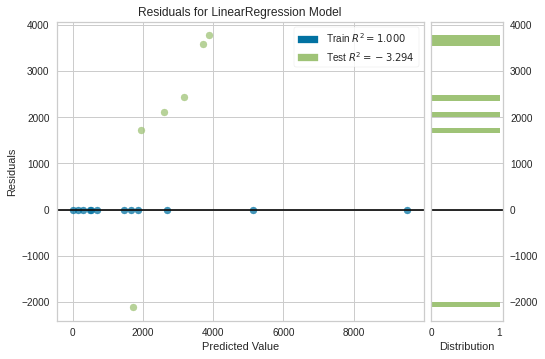

In [19]:
plot_model(lr)

In [20]:
save_model(lr, 'deployment_1')


Transformation Pipeline and Model Succesfully Saved


In [21]:
deployment_1 = load_model('deployment_1')


Transformation Pipeline and Model Sucessfully Loaded


In [22]:
deployment_1

[Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       ml_usecase='regression',
                                       numerical_features=[], target='Volume',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 numeric_strategy='mean',
                                 target_variable=None)),
                 ('new_levels1',
                  New_Catagorical_Levels_...
                 ('cluster_all', Empty()), ('dummy', Dummify(target='Volume')),
                 ('fix_perfect', Empty()), ('clean_names', Clean_Colum_Names()),
                 ('feature_select', Empty()), ('fix_multi', Empty()),
                 ('dfs',
                  DFS_Classic(interactions=['multiply']